# Aula 3c - Transformações de intensidade
## Equalização de histograma

## Importa as bibliotecas

In [1]:
%matplotlib notebook
import numpy as np

from skimage import util, color, exposure

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

## Carrega a imagem original

In [2]:
img_gray = plt.imread('./images/boat.tif')

# Informações sobre as imagens
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


Listas com os valores de intensidade

In [3]:
# Inteiro de 8 bits sem sinal
r = np.array(np.linspace(0, 255, 256))

# Float
r_ = np.array(np.linspace(0, 1, 256))

## Gera imagens com diferentes caracteristicas

In [4]:
# IMAGEM CLARA
# =============
# Define o valor do gama
gama_02 = 0.2
# Transformação gama
img_gray_clara = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_02)
# Função de transformação (para plotagem)
s_clara = r_ ** gama_02 * 255

# IMAGEM ESCURA
# ==============
# Define o valor do gama
gama_40 = 4.0
# Transformação gama
img_gray_escura = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_40)
# Função de transformação (para plotagem)
s_escura = r_ ** gama_40 * 255

# IMAGEM DE BAIXO CONTRASTE
# =========================
# Transformação linear
img_gray_baixo = (img_gray * 0.25 + 95).astype(np.uint8)
# Função de transformação (para plotagem)
s_baixo = r * 0.25 + 95

C:\Users\Joao\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Imprime informações sobre as imagens

In [5]:
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())
print(img_gray_clara.shape, img_gray_clara.dtype, img_gray_clara.min(), img_gray_clara.max())
print(img_gray_escura.shape, img_gray_escura.dtype, img_gray_escura.min(), img_gray_escura.max())
print(img_gray_baixo.shape, img_gray_baixo.dtype, img_gray_baixo.min(), img_gray_baixo.max())

(512, 512) uint8 0 239
(512, 512) uint8 0 252
(512, 512) uint8 0 197
(512, 512) uint8 95 154


### Plota as imagens

<IPython.core.display.Javascript object>


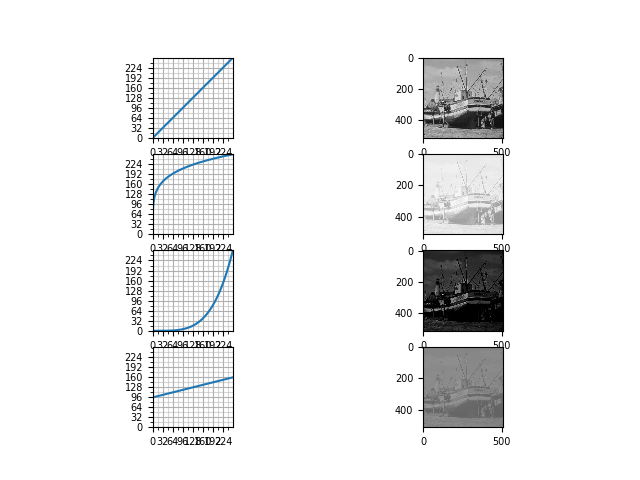

In [6]:
s_list = [r, s_clara, s_escura, s_baixo]
img_list = [img_gray, img_gray_clara, img_gray_escura, img_gray_baixo]

fig, ax  = plt.subplots(4, 2)
for i, s in enumerate(s_list):
    ch_ = ax[i,0].plot(r, s)

    ax[i,0].autoscale(enable=True, axis='both', tight=True)
    ### ax[i] = fig.gca()
    ax[i,0].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i,0].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i,0].set_yticks(np.arange(0, 256, 32), minor=False)
    ax[i,0].set_yticks(np.arange(0, 256, 16), minor=True)
    ax[i,0].set_aspect('equal')
    ax[i,0].grid(which='major', alpha=1.0)
    ax[i,0].grid(which='minor', alpha=0.5)
    ax[i,0].set_ylim(0, 256)
    ## ax[i,0].set_xlabel('Intensidade de entrada, r', fontsize='medium')
    ## ax[i,0].set_ylabel('Intensidade de sáida, s', fontsize='medium')
    
    im_ = ax[i,1].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)
    
plt.show()

## Alargamento de contraste (scikit-image)

A partir dos valores máximo e mínimo em cada imagem.

In [7]:
img_alarg_list = []

for img in img_list:
    # https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity
    img_alarg = exposure.rescale_intensity(img)    
    
    img_alarg_list.append(img_alarg)

#### Plota as imagens e os histogramas

<IPython.core.display.Javascript object>


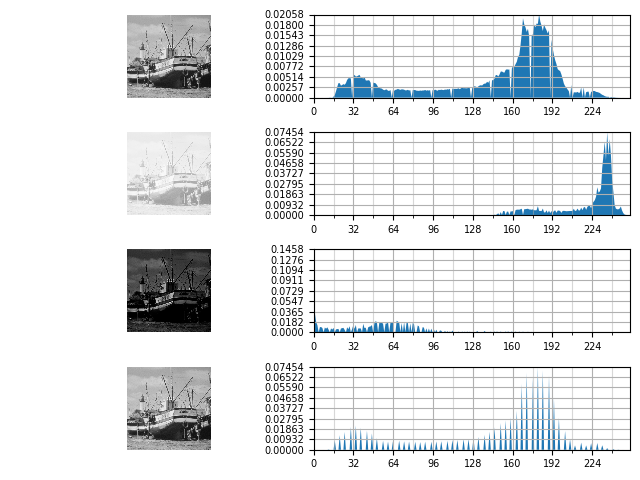

In [8]:
# Figura com 4 linha e 2 colunas
### fig, ax = plt.subplots(4, 2, figsize=(6, 14))
fig, ax = plt.subplots(4, 2)
for i, img in enumerate(img_alarg_list):
    # Plota imagem
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Computa o histograma normalizado
    hist, bins = np.histogram(img, bins=256, range=(0, 255))
    hist_norm = hist / (img.shape[0] * img.shape[1])

    # Plota histograma
    ch_ = ax[i, 1].fill_between(bins[:-1], hist_norm)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, hist_norm.max())
    ### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
    ### ax[i, 1].set_ylabel('Histograma', fontsize='medium')
    
plt.tight_layout()
plt.show()

## Alargamento de contraste (scikit-image)

A partir dos valores defindos manualmente para os pontos de controle.

In [9]:
# Imagem clara
img_clara_alarg = exposure.rescale_intensity(img_gray_clara, in_range=((255 * 0.5), 255), out_range=(0, 255))

# Imagem escura
img_escura_alarg = exposure.rescale_intensity(img_gray_escura, in_range=(0, (255 * 0.5)), out_range=(0, 255))

# image de baixo contraste
img_baixo_alarg = exposure.rescale_intensity(img_gray_baixo, in_range=((255 * 0.33), (255 * 0.66)), out_range=(0, 255))

img_alarg2_list = [img_clara_alarg, img_escura_alarg, img_baixo_alarg]

<IPython.core.display.Javascript object>


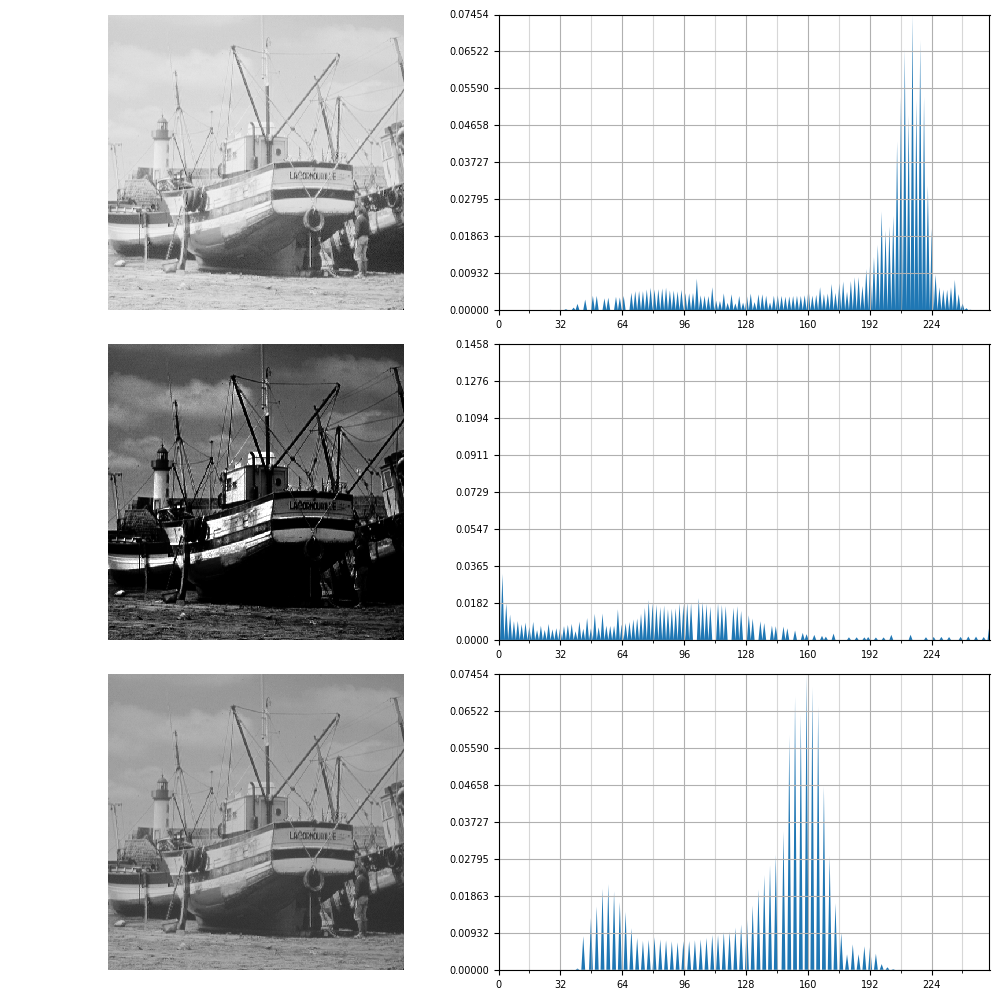

In [24]:
# Figura com 4 linha e 2 colunas
### fig, ax = plt.subplots(4, 2, figsize=(6, 14))
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
for i, img in enumerate(img_alarg2_list):
    # Plota imagem
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Computa o histograma normalizado
    hist, bins = np.histogram(img, bins=256, range=(0, 255))
    hist_norm = hist / (img.shape[0] * img.shape[1])

    # Plota histograma
    ch_ = ax[i, 1].fill_between(bins[:-1], hist_norm)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, hist_norm.max())
    ### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
    ### ax[i, 1].set_ylabel('Histograma', fontsize='medium')
    
plt.tight_layout()
plt.show()

# Equalização de histograma

In [11]:
# ========================================
# SELECIONE A IMAGEM 
# ========================================
## img_gray_ = img_gray
## img_gray_ = img_gray_clara
## img_gray_ = img_gray_escura
img_gray_ = img_gray_baixo

print(img_gray_.dtype, img_gray_.min(), img_gray_.max())

uint8 95 154


### Implementação do princípio

Obtém a função de transformação linear por partes

In [12]:
# Histograma normalizado
img_hist, img_hist_bins = exposure.histogram(img_gray_, source_range='dtype', normalize=True)

# Histograma cumulativo
# Obs.: Usar o método do NumPy. O método do scikit-image não abrange toda a faixa de valores do tipo de dado.
#       Ex.: [0, 255] para uint8.
### img_hist_cum, img_hist_cum_bins = exposure.cumulative_distribution(img_gray_)
img_hist_cum = np.cumsum(img_hist)

# Função de tranformação
transf_func = np.around(255 * img_hist_cum).astype(np.uint8)

In [13]:
print(transf_func)
print(np.unique(img_gray_))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   2   6  10  15  20  25  30  33  36
  38  40  42  44  46  48  50  51  53  55  57  59  61  63  66  68  70  73
  76  79  84  89  95 101 109 118 133 150 167 186 204 221 233 240 244 247
 248 249 250 252 253 254 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

#### Aplica a função de tranformação sobre a imagem

In [14]:
img_eq = np.zeros(img_gray_.shape, dtype=img_gray_.dtype)

for rr, ss in zip(r, transf_func):
    img_eq[img_gray_==rr] = ss   
    
# Calcula o histograma normalizado da imagem após a equalização do histograma
img_eq_hist, img_eq_hist_bins = exposure.histogram(img_eq, source_range='dtype', normalize=True)

#### Plota as imagens

<IPython.core.display.Javascript object>


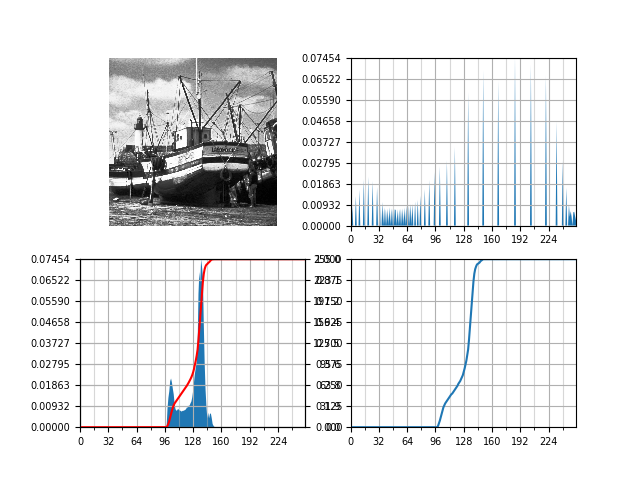

In [15]:
fig, ((ax1, ax5), (ax2, ax3)) = plt.subplots(2, 2)
# Plota imagem original
img_ = ax1.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

ax4 = ax2.twinx()

# Plota histograma
ch_1 = ax2.fill_between(img_hist_bins, img_hist)

ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, img_hist.max()+0.01, img_hist.max()/8), minor=False)
ax2.set_yticks(np.arange(0, img_hist.max()+0.01, img_hist.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, img_hist.max())

ch_2 = ax4.plot(img_hist_bins, img_hist_cum, c='r')
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 256, 32), minor=False)
ax4.set_xticks(np.arange(0, 256, 16), minor=True)
ax4.set_yticks(np.arange(0, img_hist_cum.max()+0.01, img_hist_cum.max()/8), minor=False)
ax4.set_yticks(np.arange(0, img_hist_cum.max()+0.01, img_hist_cum.max()/4), minor=True)
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, img_hist_cum.max())


ch_3 = ax3.plot(img_hist_bins, transf_func)
ax3.autoscale(enable=True, axis='both', tight=True)
ax3.set_xticks(np.arange(0, 256, 32), minor=False)
ax3.set_xticks(np.arange(0, 256, 16), minor=True)
ax3.set_yticks(np.arange(0, transf_func.max()+0.01, transf_func.max()/8), minor=False)
ax3.set_yticks(np.arange(0, transf_func.max()+0.01, transf_func.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, transf_func.max())


ch_4 = ax5.fill_between(img_eq_hist_bins, img_eq_hist)
ax5.autoscale(enable=True, axis='both', tight=True)
ax5.set_xticks(np.arange(0, 256, 32), minor=False)
ax5.set_xticks(np.arange(0, 256, 16), minor=True)
ax5.set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/8), minor=False)
ax5.set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/4), minor=True)
ax5.grid(which='major', alpha=1.0)
ax5.grid(which='minor', alpha=0.5)
ax5.set_ylim(0, img_eq_hist.max())


plt.show()

## Equalização de histograma (scikit-image)

In [16]:
img_gray_list = [img_gray, img_gray_clara, img_gray_escura, img_gray_baixo]

In [17]:
img_eq_list = []

for img in img_gray_list:
    # https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist
    img_eq = util.img_as_ubyte(exposure.equalize_hist(img))
    
    img_eq_list.append(img_eq)

Plota informações sobre as imagens

In [18]:
for img in img_eq_list:
    print(img.shape, img.dtype, img.min(), img.max())

(512, 512) uint8 0 255
(512, 512) uint8 0 255
(512, 512) uint8 37 255
(512, 512) uint8 0 255


### Plota as imagens

<IPython.core.display.Javascript object>


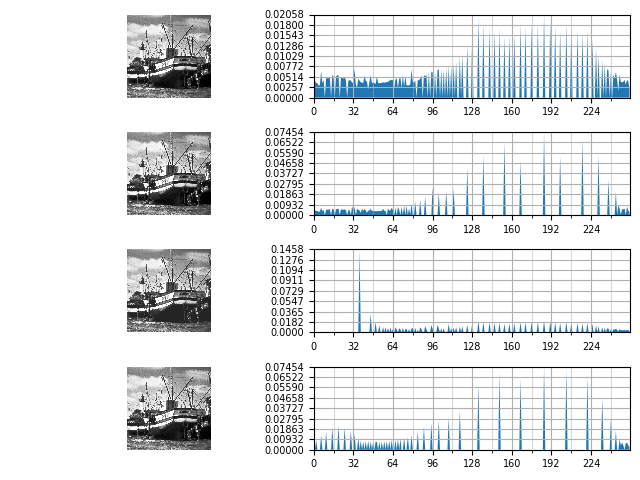

In [19]:
# Figura com 4 linha e 2 colunas
### fig, ax = plt.subplots(4, 2, figsize=(6, 14))
fig, ax = plt.subplots(4, 2)
for i, img in enumerate(img_eq_list):
    # Plota imagem
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Computa o histograma normalizado
    img_eq_hist, img_eq_hist_bins = exposure.histogram(img, source_range='dtype', normalize=True)

    # Plota histograma
    ch_ = ax[i, 1].fill_between(img_eq_hist_bins, img_eq_hist)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, img_eq_hist.max()+0.01, img_eq_hist.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, img_eq_hist.max())
    
plt.tight_layout()
plt.show()

# Bibliografia

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

scikit-image. Documentação. Módulo 'exposure'.

    https://scikit-image.org/docs/dev/api/skimage.exposure.html
    
scikit-image. Gamma and log contrast adjustment.

    https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_log_gamma.html

scikit-image. Histogram Equalization.

    https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html

scikit-image. Local Histogram Equalization

    https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_local_equalize.html

NumPy. Documentação.

       https://numpy.org/doc/stable/